In [47]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [4]:
data = np.loadtxt('24-02-08-14-28.data')

In [5]:
data.shape

(436192, 2)

In [23]:
good_counts = []
bad_counts = 0

for item in data[:,0]:
    if item >= 40000:
        bad_counts += int(item - 40000)
    else:
        good_counts.append(item)
good_counts = np.asarray(good_counts)

In [24]:
len(good_counts)

10813

In [25]:
bad_counts

5628782

In [37]:
bins = [3.92157(i+1) for i in range(51])*

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


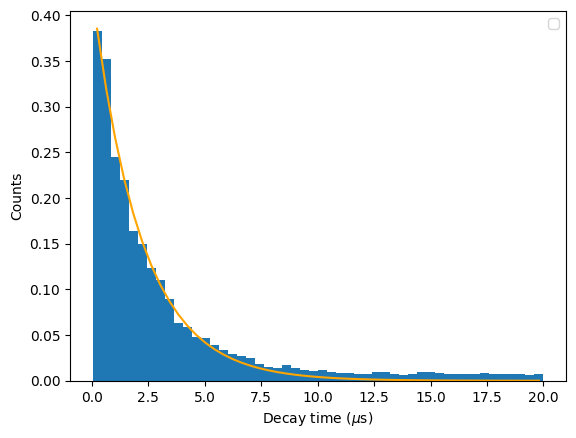

In [164]:
counts, bin_edges, fig = plt.hist(good_counts/1000, bins=50, density=True)
plt.xlabel('Decay time ($\mu$s)')
plt.ylabel('Counts')


#counts = counts/counts.max()
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

def exp(x, a, b):
    return a*np.exp(-b*x)

parameters, cov = curve_fit(exp, bin_centers, counts)

plt.plot(bin_centers, exp(bin_centers, *parameters), color='orange')
plt.legend()
plt.show()

In [165]:
print(parameters)

[0.43060911 0.46451375]


In [166]:
1/parameters[1]

2.1527888254449543

In [50]:
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])


def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)


# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, bin_centers, entries)

/Users/corbin/Library/Python/3.9/lib/python/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [61]:
parameters[0]

1.0

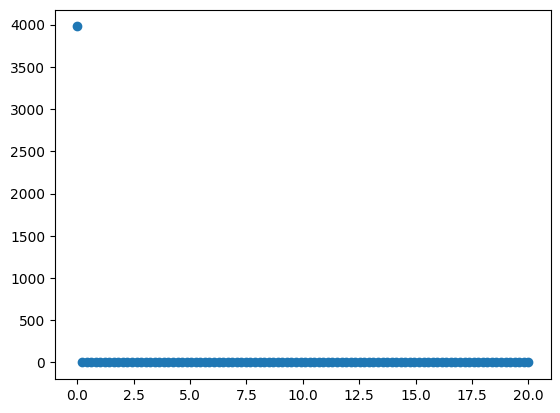

In [70]:
plt.plot(
    x_plot,
    fit_function(x_plot, *parameters)*len(good_counts),
    marker='o', linestyle='',
    label='Fit result',
)

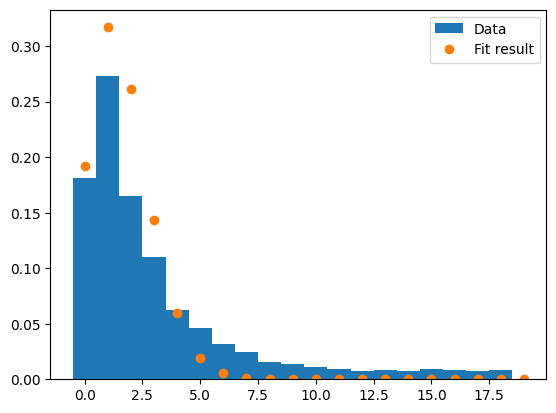

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson

data = np.asarray(good_counts)/1000
bins = np.arange(0, 20) - 0.5
entries, bin_edges, patches = plt.hist(data, bins=bins, density=True, label='Data')

bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)

parameters, cov_matrix = curve_fit(fit_function, bin_centers, entries)

x_plot = np.arange(0, 20)

plt.plot(x_plot,fit_function(x_plot, *parameters),marker='o', linestyle='',label='Fit result')
plt.legend()
plt.show()